In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from astropy.time import Time
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from datetime import datetime 
import matplotlib.ticker as tck
import numpy as np

In [8]:
data = pd.read_csv("/Users/priyanujkashyap/Documents/GitHub/KWS24/InSituObs/OMNI_HRO_5MIN_2235001.txt", 
                   sep='\s+', comment='#', skiprows=73, header=None, names=['day', 'time', 'B', 'Bx', 'By', 'Bz', 'v', 'n', 'T', 'beta'])

In [9]:
data

,day,time,B,Bx,By,Bz,v,n,T,beta
0,14-07-2012,00:00:00.000,4.02,-3.65,1.44,-0.77,325.7,3.00,11312.0,1.08
1,14-07-2012,00:05:00.000,4.01,-3.66,1.42,-0.85,325.8,2.94,11875.0,1.07
2,14-07-2012,00:10:00.000,4.00,-3.62,1.48,-0.85,99999.9,999.99,10000000.0,999.99
3,14-07-2012,00:15:00.000,9999.99,9999.99,9999.99,9999.99,99999.9,999.99,10000000.0,999.99
4,14-07-2012,00:20:00.000,4.04,-3.62,1.58,-0.82,325.2,3.02,9378.0,1.06
...,...,...,...,...,...,...,...,...,...,...
1148,17-07-2012,23:40:00.000,5.26,3.96,-2.30,-1.61,427.3,1.08,72955.0,0.33
1149,17-07-2012,23:45:00.000,5.19,2.77,-3.72,0.06,456.1,0.95,93324.0,0.32
1150,17-07-2012,23:50:00.000,5.09,2.86,-4.11,0.59,460.0,0.95,101417.0,0.35
1151,17-07-2012,23:55:00.000,5.28,3.11,-4.02,-0.90,462.0,0.90,93138.0,0.30


In [10]:
def conv_dates_series(df, col, old_date_format, new_date_format):

    df[col] = pd.to_datetime(df[col], format=old_date_format).dt.strftime(new_date_format)
    
    return df

conv_dates_series(data, 'day', "%d-%m-%Y", "%Y-%m-%d")

,day,time,B,Bx,By,Bz,v,n,T,beta
0,2012-07-14,00:00:00.000,4.02,-3.65,1.44,-0.77,325.7,3.00,11312.0,1.08
1,2012-07-14,00:05:00.000,4.01,-3.66,1.42,-0.85,325.8,2.94,11875.0,1.07
2,2012-07-14,00:10:00.000,4.00,-3.62,1.48,-0.85,99999.9,999.99,10000000.0,999.99
3,2012-07-14,00:15:00.000,9999.99,9999.99,9999.99,9999.99,99999.9,999.99,10000000.0,999.99
4,2012-07-14,00:20:00.000,4.04,-3.62,1.58,-0.82,325.2,3.02,9378.0,1.06
...,...,...,...,...,...,...,...,...,...,...
1148,2012-07-17,23:40:00.000,5.26,3.96,-2.30,-1.61,427.3,1.08,72955.0,0.33
1149,2012-07-17,23:45:00.000,5.19,2.77,-3.72,0.06,456.1,0.95,93324.0,0.32
1150,2012-07-17,23:50:00.000,5.09,2.86,-4.11,0.59,460.0,0.95,101417.0,0.35
1151,2012-07-17,23:55:00.000,5.28,3.11,-4.02,-0.90,462.0,0.90,93138.0,0.30


In [11]:
data['date_time'] = data['day'].astype(str) +"T"+ data['time'].astype(str)
data

,day,time,B,Bx,By,Bz,v,n,T,beta,date_time
0,2012-07-14,00:00:00.000,4.02,-3.65,1.44,-0.77,325.7,3.00,11312.0,1.08,2012-07-14T00:00:00.000
1,2012-07-14,00:05:00.000,4.01,-3.66,1.42,-0.85,325.8,2.94,11875.0,1.07,2012-07-14T00:05:00.000
2,2012-07-14,00:10:00.000,4.00,-3.62,1.48,-0.85,99999.9,999.99,10000000.0,999.99,2012-07-14T00:10:00.000
3,2012-07-14,00:15:00.000,9999.99,9999.99,9999.99,9999.99,99999.9,999.99,10000000.0,999.99,2012-07-14T00:15:00.000
4,2012-07-14,00:20:00.000,4.04,-3.62,1.58,-0.82,325.2,3.02,9378.0,1.06,2012-07-14T00:20:00.000
...,...,...,...,...,...,...,...,...,...,...,...
1148,2012-07-17,23:40:00.000,5.26,3.96,-2.30,-1.61,427.3,1.08,72955.0,0.33,2012-07-17T23:40:00.000
1149,2012-07-17,23:45:00.000,5.19,2.77,-3.72,0.06,456.1,0.95,93324.0,0.32,2012-07-17T23:45:00.000
1150,2012-07-17,23:50:00.000,5.09,2.86,-4.11,0.59,460.0,0.95,101417.0,0.35,2012-07-17T23:50:00.000
1151,2012-07-17,23:55:00.000,5.28,3.11,-4.02,-0.90,462.0,0.90,93138.0,0.30,2012-07-17T23:55:00.000


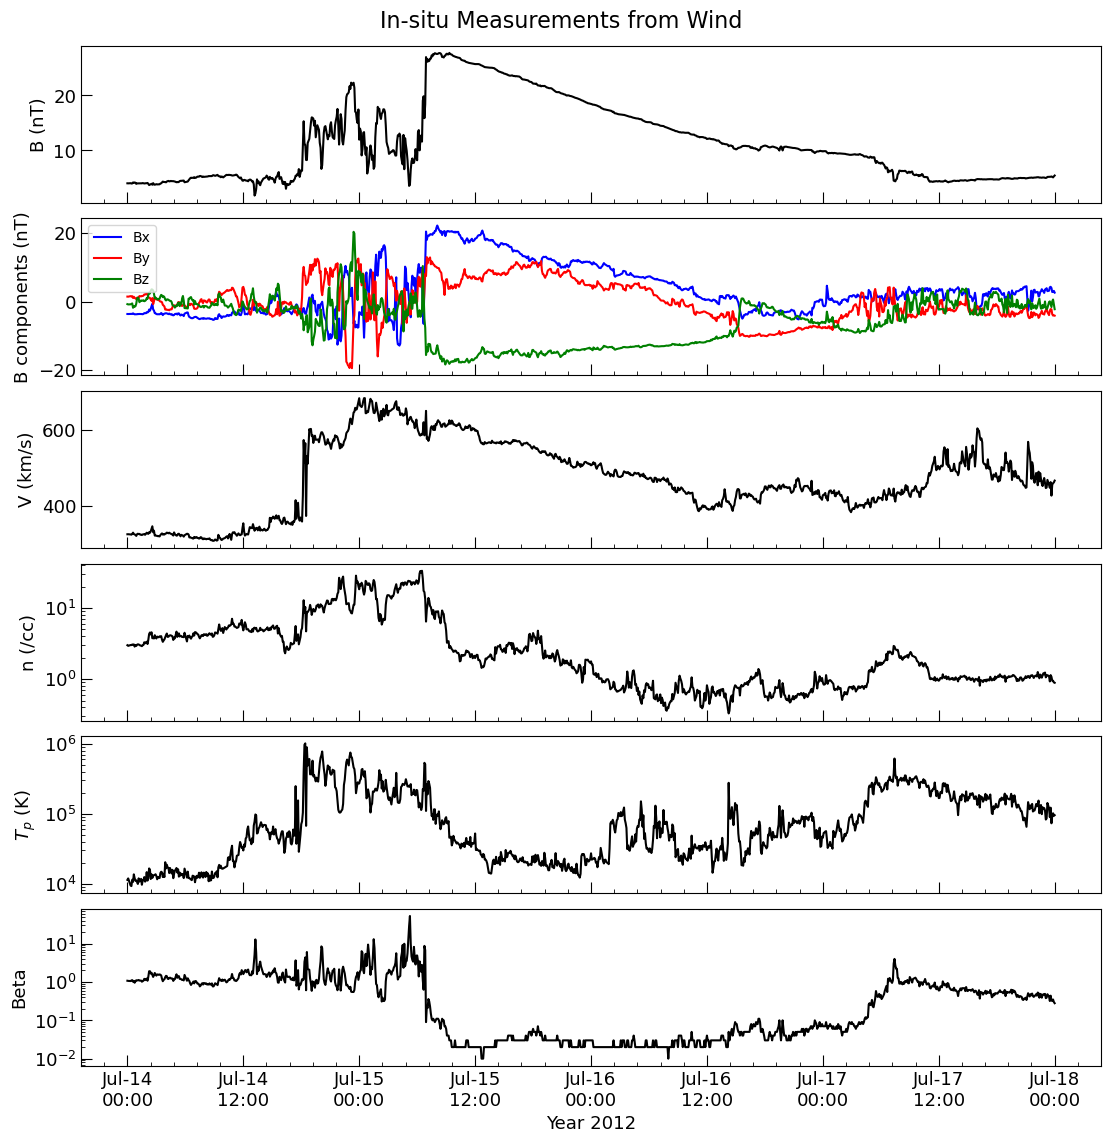

In [12]:
fig, (ax, ax1,ax2,ax3,ax4,ax5) = plt.subplots(6,1,figsize=(12,12))

fig.suptitle("In-situ Measurements from Wind", fontsize=16)

filtered_data = data[data['beta'] < 900.0]

a = [datetime.strptime(d, '%Y-%m-%dT%H:%M:%S.%f') for d in filtered_data['date_time'] ]



### Plotting the toatal magnetic field strength of ICME

ax.plot(a, filtered_data['B'], color='black')

ax.set_ylabel('B (nT)', fontsize=13)

ax.tick_params(
    axis='both',          
    which='major',     
    bottom=True,      
    top=False,         
    labelbottom=False,labelsize=13, length=8,direction='in'
)
ax.tick_params(
    axis='both',         
    which='minor',      
    bottom=True,      
    top=False,        
    labelbottom=False, length=3,direction='in'  
)
  

### Plotting the magnetic field components of ICME

ax1.plot(a, filtered_data['Bx'], color='blue', label='Bx')
ax1.plot(a, filtered_data['By'], color='red', label='By')
ax1.plot(a, filtered_data['Bz'], color='green', label='Bz')
ax1.legend(loc='upper left')
ax1.set_ylabel('B components (nT)', fontsize=13)
ax1.tick_params(
    axis='both',         
    which='major',     
    bottom=True,     
    top=False,         
    labelbottom=False,labelsize=13, length=8,direction='in'  
)
ax1.tick_params(
    axis='both',          
    which='minor',     
    bottom=True,      
    top=False,         
    labelbottom=False, length=3,direction='in'  
)
  
### Plotting the speed of ICME

ax2.plot(a, filtered_data['v'], color='black')

ax2.set_ylabel('V (km/s)', fontsize=13)
ax2.tick_params(
    axis='both',          
    which='major',      
    bottom=True,      
    top=False,
    left=True, 
    right= False,                 
    labelbottom=False,labelsize=13, length=8 ,direction='in' 
)
ax2.tick_params(
    axis='both',         
    which='minor',     
    bottom=True,      
    top=False,  
    left=True, 
    right= False,    
    labelbottom=False, length=3,direction='in'  
)


### Plotting the density of ICME   
    
ax3.set_yscale('log')
ax3.plot(a, filtered_data['n'], color='black')
ax3.set_ylabel('n (/cc)', fontsize=13)
ax3.tick_params(
    axis='both',          
    which='major',      
    bottom=True,      
    top=False,         
    labelbottom=False,labelsize=13, length=8,direction='in'  
)
ax3.tick_params(
    axis='both',          
    which='minor',      
    bottom=True,      
    top=False,        
    labelright=False, length=3,direction='in' 
)
  
### Plotting the temperature of ICME
    
ax4.set_yscale('log')
ax4.plot(a, filtered_data['T'], color='black')
ax4.set_ylabel('$T_p$ (K)', fontsize=13)
ax4.tick_params(
    axis='both',          
    which='major',     
    bottom=True,      
    top=False,         
    labelbottom=False,labelsize=13, length=8,direction='in'  
)
ax4.tick_params(
    axis='both',          
    which='minor',      
    bottom=True,      
    top=False,         
    labelbottom=False, length=3 ,direction='in' 
)
  
    
## plotting plasma beta of ICME

ax5.set_yscale('log')
ax5.plot(a, filtered_data['beta'], color='black')
ax5.set_ylabel('Beta', fontsize=13)
ax5.tick_params(
    axis='both',         
    which='major',      
    bottom=True,      
    top=False,         
    labelbottom=True,labelsize=13, length=8,direction='in'  
)
ax5.tick_params(
    axis='both',         
    which='minor',      
    bottom=True,     
    top=False,         
    labelbottom=True, length=3,direction='in' 
)
   

ax5.set_xlabel('Year 2012', fontsize=13)
date_form = DateFormatter("%b-%d\n%H:%M")
ax5.xaxis.set_major_formatter(date_form)



### minor ticks
ax.xaxis.set_tick_params(which='minor', bottom=True)
ax1.xaxis.set_tick_params(which='minor', bottom=True)
ax2.xaxis.set_tick_params(which='minor', bottom=True)
ax3.xaxis.set_tick_params(which='minor', bottom=True)
ax4.xaxis.set_tick_params(which='minor', bottom=True)
ax5.xaxis.set_tick_params(which='minor', bottom=True)

ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax1.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax2.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax3.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax4.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax5.xaxis.set_minor_locator(tck.AutoMinorLocator())


## redefining the plotting area

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.95, 
                    top=0.95, 
                    wspace=0.1, 
                    hspace=0.1)


#plt.savefig('ICME_14july2012_0.png', dpi=400)
#cyan,brown,blue,darkviolet,magenta

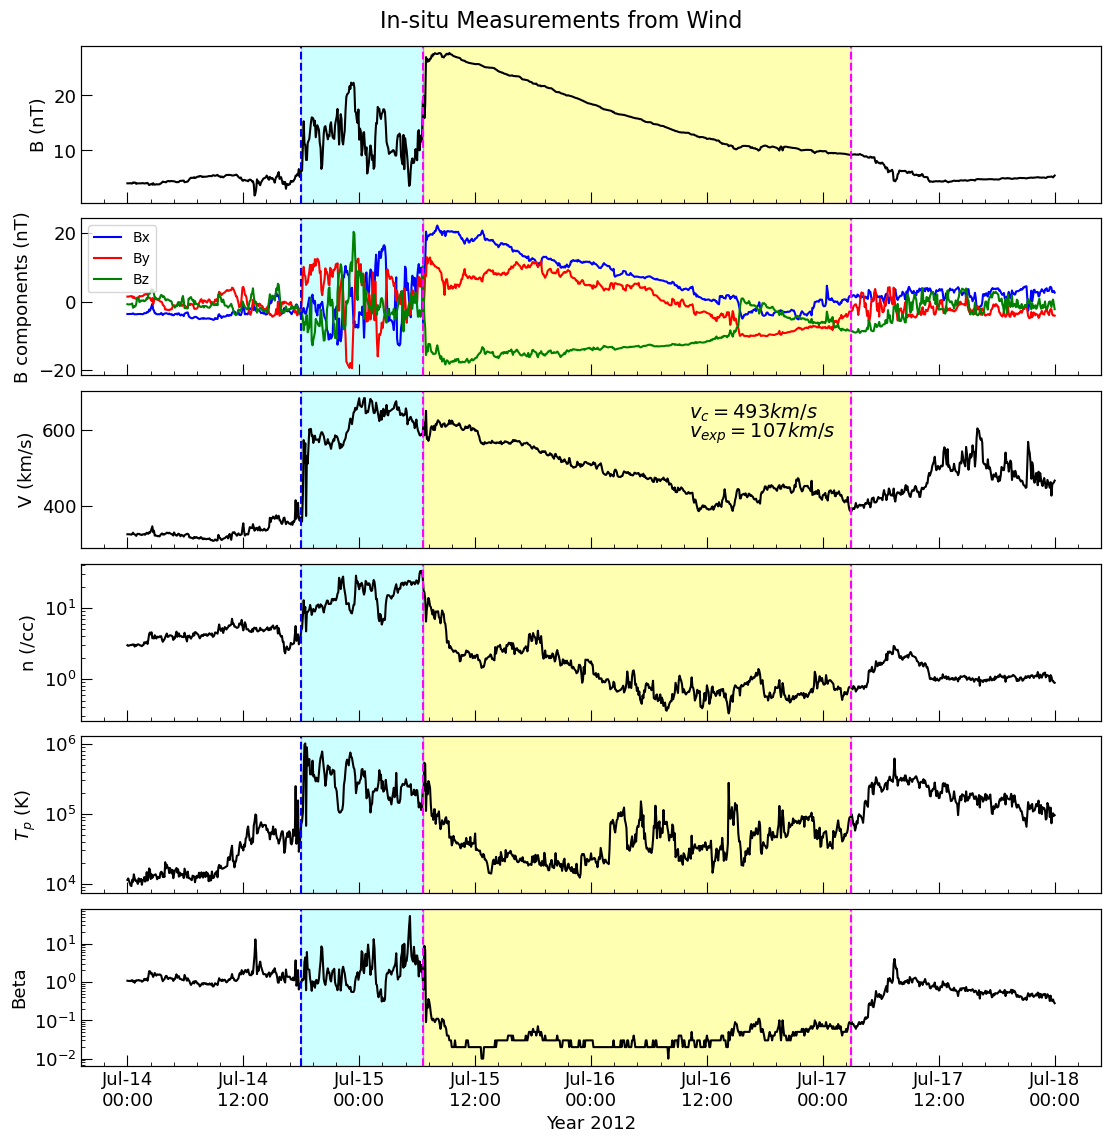

In [13]:
fig, (ax, ax1,ax2,ax3,ax4,ax5) = plt.subplots(6,1,figsize=(12,12))

fig.suptitle("In-situ Measurements from Wind", fontsize=16)

filtered_data = data[data['beta'] < 900.0]

a = [datetime.strptime(d, '%Y-%m-%dT%H:%M:%S.%f') for d in filtered_data['date_time'] ]



### Plotting the toatal magnetic field strength of ICME

ax.plot(a, filtered_data['B'], color='black')

ax.set_ylabel('B (nT)', fontsize=13)

ax.tick_params(
    axis='both',          
    which='major',     
    bottom=True,      
    top=False,         
    labelbottom=False,labelsize=13, length=8,direction='in'
)
ax.tick_params(
    axis='both',         
    which='minor',      
    bottom=True,      
    top=False,        
    labelbottom=False, length=3,direction='in'  
)
  

### Plotting the magnetic field components of ICME

ax1.plot(a, filtered_data['Bx'], color='blue', label='Bx')
ax1.plot(a, filtered_data['By'], color='red', label='By')
ax1.plot(a, filtered_data['Bz'], color='green', label='Bz')
ax1.legend(loc='upper left')
ax1.set_ylabel('B components (nT)', fontsize=13)
ax1.tick_params(
    axis='both',         
    which='major',     
    bottom=True,     
    top=False,         
    labelbottom=False,labelsize=13, length=8,direction='in'  
)
ax1.tick_params(
    axis='both',          
    which='minor',     
    bottom=True,      
    top=False,         
    labelbottom=False, length=3,direction='in'  
)
  
### Plotting the speed of ICME

ax2.plot(a, filtered_data['v'], color='black')

ax2.set_ylabel('V (km/s)', fontsize=13)
ax2.tick_params(
    axis='both',          
    which='major',      
    bottom=True,      
    top=False,
    left=True, 
    right= False,                 
    labelbottom=False,labelsize=13, length=8 ,direction='in' 
)
ax2.tick_params(
    axis='both',         
    which='minor',     
    bottom=True,      
    top=False,  
    left=True, 
    right= False,    
    labelbottom=False, length=3,direction='in'  
)

#### estimatind the axis and expansion speed of ICME

ax2.text(a[680], 630, '$v_c = 493 km/s$', fontsize = 14) 
ax2.text(a[680], 580, '$v_{exp} = 107 km/s$', fontsize = 14) 



### Plotting the density of ICME   
    
ax3.set_yscale('log')
ax3.plot(a, filtered_data['n'], color='black')
ax3.set_ylabel('n (/cc)', fontsize=13)
ax3.tick_params(
    axis='both',          
    which='major',      
    bottom=True,      
    top=False,         
    labelbottom=False,labelsize=13, length=8,direction='in'  
)
ax3.tick_params(
    axis='both',          
    which='minor',      
    bottom=True,      
    top=False,        
    labelright=False, length=3,direction='in' 
)
  
### Plotting the temperature of ICME
    
ax4.set_yscale('log')
ax4.plot(a, filtered_data['T'], color='black')
ax4.set_ylabel('$T_p$ (K)', fontsize=13)
ax4.tick_params(
    axis='both',          
    which='major',     
    bottom=True,      
    top=False,         
    labelbottom=False,labelsize=13, length=8,direction='in'  
)
ax4.tick_params(
    axis='both',          
    which='minor',      
    bottom=True,      
    top=False,         
    labelbottom=False, length=3 ,direction='in' 
)
  
    
## plotting plasma beta of ICME

ax5.set_yscale('log')
ax5.plot(a, filtered_data['beta'], color='black')
ax5.set_ylabel('Beta', fontsize=13)
ax5.tick_params(
    axis='both',         
    which='major',      
    bottom=True,      
    top=False,         
    labelbottom=True,labelsize=13, length=8,direction='in'  
)
ax5.tick_params(
    axis='both',         
    which='minor',      
    bottom=True,     
    top=False,         
    labelbottom=True, length=3,direction='in' 
)
   

ax5.set_xlabel('Year 2012', fontsize=13)
date_form = DateFormatter("%b-%d\n%H:%M")
ax5.xaxis.set_major_formatter(date_form)



### minor ticks
ax.xaxis.set_tick_params(which='minor', bottom=True)
ax1.xaxis.set_tick_params(which='minor', bottom=True)
ax2.xaxis.set_tick_params(which='minor', bottom=True)
ax3.xaxis.set_tick_params(which='minor', bottom=True)
ax4.xaxis.set_tick_params(which='minor', bottom=True)
ax5.xaxis.set_tick_params(which='minor', bottom=True)

ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax1.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax2.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax3.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax4.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax5.xaxis.set_minor_locator(tck.AutoMinorLocator())




##overplot the leading and trailing edge of ICME

ax00 = ax.twinx()
ax00.axvline(a[205], color='blue',linestyle='--') ## shock
ax00.axvline(a[352], color='magenta',linestyle='--')
ax00.axvline(a[880], color='magenta',linestyle='--')
yax = ax00.axes.get_yaxis()
ax00 = yax.set_visible(False)


ax11 = ax1.twinx()
ax11.axvline(a[205], color='blue',linestyle='--') ## shock
ax11.axvline(a[352], color='magenta',linestyle='--')
ax11.axvline(a[880], color='magenta',linestyle='--')
yax = ax11.axes.get_yaxis()
ax11 = yax.set_visible(False)


ax22 = ax2.twinx()
ax22.axvline(a[205], color='blue',linestyle='--') ## shock
ax22.axvline(a[352], color='magenta',linestyle='--')
ax22.axvline(a[880], color='magenta',linestyle='--')
yax = ax22.axes.get_yaxis()
ax22 = yax.set_visible(False)


ax33 = ax3.twinx()
ax33.axvline(a[205], color='blue',linestyle='--') ## shock
ax33.axvline(a[352], color='magenta',linestyle='--')
ax33.axvline(a[880], color='magenta',linestyle='--')
yax = ax33.axes.get_yaxis()
ax33 = yax.set_visible(False)
    
    
ax44 = ax4.twinx()
ax44.axvline(a[205], color='blue',linestyle='--') ## shock
ax44.axvline(a[352], color='magenta',linestyle='--')
ax44.axvline(a[880], color='magenta',linestyle='--')
yax = ax44.axes.get_yaxis()
ax44 = yax.set_visible(False)


ax55 = ax5.twinx()
ax55.axvline(a[205], color='blue',linestyle='--') ## shock
ax55.axvline(a[352], color='magenta',linestyle='--')
ax55.axvline(a[880], color='magenta',linestyle='--')
yax = ax55.axes.get_yaxis()
ax55 = yax.set_visible(False)

# Highlight the ICME area
ax.axvspan(a[352],a[880], facecolor='yellow', alpha=0.3, edgecolor='magenta', linewidth=1)
ax1.axvspan(a[352],a[880], facecolor='yellow', alpha=0.3, edgecolor='magenta', linewidth=1)
ax2.axvspan(a[352],a[880], facecolor='yellow', alpha=0.3, edgecolor='magenta', linewidth=1)
ax3.axvspan(a[352],a[880], facecolor='yellow', alpha=0.3, edgecolor='magenta', linewidth=1)
ax4.axvspan(a[352],a[880], facecolor='yellow', alpha=0.3, edgecolor='magenta', linewidth=1)
ax5.axvspan(a[352],a[880], facecolor='yellow', alpha=0.3, edgecolor='magenta', linewidth=1)

# Highlight the Sheath area
ax.axvspan(a[205],a[352], facecolor='cyan', alpha=0.2, edgecolor='blue', linewidth=1)
ax1.axvspan(a[205],a[352], facecolor='cyan', alpha=0.2, edgecolor='blue', linewidth=1)
ax2.axvspan(a[205],a[352], facecolor='cyan', alpha=0.2, edgecolor='blue', linewidth=1)
ax3.axvspan(a[205],a[352], facecolor='cyan', alpha=0.2, edgecolor='blue', linewidth=1)
ax4.axvspan(a[205],a[352], facecolor='cyan', alpha=0.2, edgecolor='blue', linewidth=1)
ax5.axvspan(a[205],a[352], facecolor='cyan', alpha=0.2, edgecolor='blue', linewidth=1)




# redefining the plotting area

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.95, 
                    top=0.95, 
                    wspace=0.1, 
                    hspace=0.1)


plt.savefig('ICME_14july2012_final.png', dpi=400)
#cyan,brown,blue,darkviolet,magenta